#### Import packages

In [1]:
import numpy as np
import timeit
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import mandulakenyer as mk # contains mandelbrot implementations
import utils # contains utilities

##### Setting parameters

In [3]:
RE_MIN = -2
RE_MAX = 1
IM_MIN = -1.5
IM_MAX = 1.5

RE_SCALE = 1000
IM_SCALE = 1000

T = 2 # threshold
I = 100 # iteration

# previously, on NSC Handin
# for parallel computing
BEST_PROC_NUM = 5
BEST_CHUNKS_NUM = 20

In [4]:
re = [RE_MIN, RE_MAX, RE_SCALE]
im = [IM_MIN, IM_MAX, IM_SCALE]

# list of data types, None was used last time
dt_lst = [ None, 'float16', 'float32', 'float64'] 

df = pd.DataFrame()
iter_num = 5 # for timeit

comp_lst ={
    None : "complex", # last time this was used
    "float16" : "complex64", # complex is two float32
    "float32" : "complex64", # complex is two float32
    "float64" : "complex128" # complex is two float64
}

#### Measuring time the different implementations with different data types 

In [5]:
for dt in dt_lst:
    t = timeit.Timer(lambda: mk.naive(re, im, dt, I, T)).timeit(iter_num)
    new_row = pd.DataFrame(utils.add_new_row('naive', dt, t))
    df = pd.concat([df, new_row], ignore_index=True)

In [6]:
for dt in dt_lst:
    comp_dt = comp_lst[dt]
    t = timeit.Timer(lambda: mk.vectorized(re, im, dt, comp_dt, I, T)).timeit(iter_num)
    new_row = pd.DataFrame(utils.add_new_row('vectorized', dt, t))
    df = pd.concat([df, new_row], ignore_index=True)

c:\Users\Kata\Documents\AAU\CE8\NSC\code\ce8-nsc\mini project 2\mandulakenyer.py:44: RuntimeWarning: overflow encountered in square
  z = z**2 + c
c:\Users\Kata\Documents\AAU\CE8\NSC\code\ce8-nsc\mini project 2\mandulakenyer.py:44: RuntimeWarning: invalid value encountered in square
  z = z**2 + c
c:\Users\Kata\Documents\AAU\CE8\NSC\code\ce8-nsc\mini project 2\mandulakenyer.py:45: RuntimeWarning: overflow encountered in absolute
  M[thresh <= abs(z)] = i


In [7]:
for dt in dt_lst:
    t = timeit.Timer(
            lambda: mk.parallelize(mk.parallel_mb, BEST_PROC_NUM, BEST_CHUNKS_NUM, re, im, dt, I, T)
        ).timeit(iter_num)
    
    
    new_row = pd.DataFrame(utils.add_new_row('parallel', dt, t))
    df = pd.concat([df, new_row], ignore_index=True)

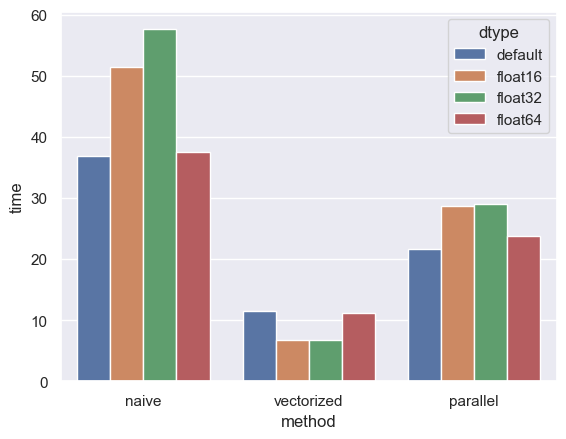

In [8]:
sns.set()
sns.barplot(x='method', y='time', hue='dtype', data=df)
plt.show()